In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/officetel.csv',encoding='cp949')

C:\Users\USER\AppData\Local\Temp\ipykernel_12468\2346166869.py:1: DtypeWarning: Columns (14,16,17,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/officetel.csv',encoding='cp949')


In [3]:
df=df.loc[:,['시군구명','전용면적','층','건축년도','거래금액']]

In [4]:
df.dropna(inplace=True)

In [5]:
y=df['거래금액']

In [6]:
X=df.drop(columns='거래금액')

In [7]:
numerical=['전용면적','층','건축년도']

In [8]:
categorical=['시군구명']

In [9]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer()

In [10]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [11]:
labe_encoder=OrdinalEncoder()
onehot_encoder=OneHotEncoder()

In [12]:
from sklearn.compose import ColumnTransformer

In [13]:
onehot_colums=['시군구명']

In [14]:
numeric_columns=['전용면적','층','건축년도']

In [15]:
preprocessor=ColumnTransformer([
    ('num',imputer,numeric_columns),
    ('onehot',onehot_encoder,onehot_colums)
])

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
regressor=RandomForestRegressor(random_state=47)

In [18]:
from sklearn.pipeline import Pipeline

In [19]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('modeling',regressor)])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=47)

In [22]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['전용면적', '층', '건축년도']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['시군구명'])])),
                ('modeling', RandomForestRegressor(random_state=47))])

In [23]:
y_pred=pipeline.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error,r2_score

In [25]:
mean_absolute_error(y_test,y_pred)

2273.5241413342405

In [26]:
r2_score(y_test,y_pred)

0.8876374907444649

In [27]:
df_y=y_test.to_frame()

In [28]:
df_y['pred']=y_pred

In [29]:
df_y.reset_index(drop=True,inplace=True)

c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


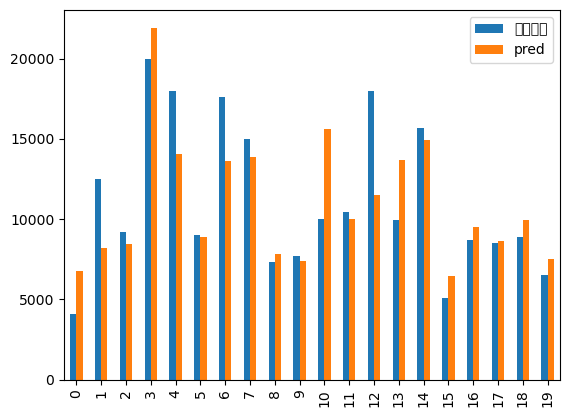

In [30]:
df_y.loc[0:19,:].plot(kind='bar')
plt.show()

In [31]:
df.head(2)

,시군구명,전용면적,층,건축년도,거래금액
0,경기도 수원시권선구,28,7,2020.0,16100
1,경기도 수원시권선구,39,8,2020.0,22100


In [32]:
import numpy as np
new_data = np.array([['경기도성남시분당구', 20, 9,2020]])

In [33]:
new_data_df = pd.DataFrame(new_data, columns=['시군구명','전용면적','층','건축년도'])

In [34]:
new_data.reshape(1,-1)

array([['경기도성남시분당구', '20', '9', '2020']], dtype='<U11')

In [35]:
pipeline.predict(new_data_df)

array([11508.65345238])

In [36]:
import joblib

In [37]:
joblib.dump(pipeline,'officetel.pkl')

['officetel.pkl']

In [38]:
df['시군구명'].unique()

array(['경기도 수원시권선구', '경기도 화성시', '경기도 시흥시', '경기도 오산시', '경기도 고양시일산동구',
       '경기도 하남시', '경기도용인시처인구', '경기도의정부시', '경기도수원시영통구', '경기도안양시동안구',
       '경기도 남양주시', '경기도김포시', '경기도 수원시팔달구', '경기도 평택시', '경기도안산시상록구',
       '경기도고양시일산동구', '경기도 과천시', '경기도 김포시', '경기도 용인시처인구', '경기도 고양시덕양구',
       '경기도 파주시', '경기도 부천시원미구', '경기도 의정부시', '경기도 안양시동안구', '경기도 성남시수정구',
       '경기도 안양시만안구', '경기도 성남시중원구', '경기도 성남시분당구', '경기도용인시기흥구', '경기도시흥시',
       '경기도화성시', '경기도부천시원미구', '경기도남양주시', '경기도평택시', '경기도 용인시기흥구',
       '경기도 수원시영통구', '경기도 군포시', '경기도하남시', '경기도 안산시단원구', '경기도성남시분당구',
       '경기도 용인시수지구', '경기도성남시수정구', '경기도수원시팔달구', '경기도안산시단원구', '경기도 이천시',
       '경기도고양시덕양구', '경기도수원시권선구', '경기도군포시', '경기도오산시', '경기도안양시만안구',
       '경기도 안성시', '경기도 구리시', '경기도 여주시', '경기도구리시', '경기도광명시', '경기도용인시수지구',
       '경기도 부천시소사구', '경기도부천시소사구', '경기도성남시중원구', '경기도의왕시', '경기도이천시',
       '경기도 수원시장안구', '경기도파주시', '경기도 의왕시', '경기도 광명시', '경기도 안산시상록구',
       '경기도 고양시일산서구', '경기도고양시일산서구', '경기도여주시', '경기도안성시', '경기도과천시',
       '경기도광주시', '경기도 포천시', '경기도 가평군'